## Extracting Database Data

For extracting the required datasets from the database I used plain SQL queries.
To extract the specific city data I used the following query (my nearest city in the database is Berlin):

```sql
Select * from city_data where city='Berlin';
```

Extracting this data gave me the temperature values for Berlin. I placed the resulting file into a Github Repository for beeing accessible from everywhere.
For extracting the global data I simply used:

```sql
Select * from global_data;
```
  
I placed the resulting file into a Github Repository too.

## Creating Line Charts and calculating Moving Average
  * I'm using __Python with Pandas__ for Data Processing and __Matplotlib__ for visualizing the data
  * Advantages of Pandas for this task:
      * Allows very easy data processing and data cleaning by using builtin functions
  * Advantages of Matplotlib for this task:
      * Matplotlib works well together with Pandas specific data structures like Pandas Dataframes
      * moreover it's nicely integrated into Jupyter Notebooks which allows to output my visualization within the script
      * we are able to modify the resulting plot completely to our needs

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("ggplot")
%matplotlib inline

### Reading csv values into variables
  * uploading the data sources to a public location allows flexible data access
  * as I do the whole data processing and visualization with Python it will be the easiest way to read the files with Python too

In [68]:
berlin_csv="https://raw.githubusercontent.com/herrfeder/DataAnalyst/master/01_ExploreWeatherTrends/berlin.csv"
global_csv="https://raw.githubusercontent.com/herrfeder/DataAnalyst/master/01_ExploreWeatherTrends/global_data.csv"
berlin_df=pd.read_csv(berlin_csv)
global_df=pd.read_csv(global_csv)


### Cleaning Data
  * remove NaN values
  * remove unused columns

In [69]:
berlin_df = berlin_df.dropna()
berlin_df = berlin_df.drop(['country'],axis=1)
global_df = global_df.dropna()

### Visualize data (without moving average)

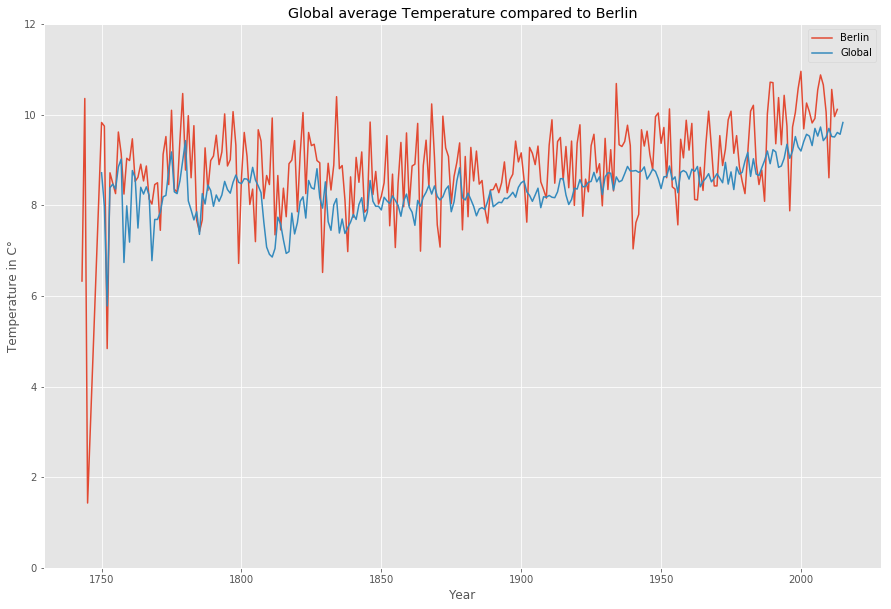

In [70]:
fig = plt.figure(figsize=(15,10))

for frame in [berlin_df, global_df]:
    plt.plot(frame['year'], frame['avg_temp'])

plt.title("Global average Temperature compared to Berlin")
plt.xlabel("Year")
plt.ylabel("Temperature in C°")
plt.gca().legend(('Berlin','Global'))
plt.ylim(0,12)
plt.show()

### Calculate moving average
  * we can see that the data without further data processing is very volatile and it's difficult to observe significant trends
  * therefore I'm using the statistical method of calculating the moving average
  * I use the pandas function __rolling__ for calculating the Moving Average by calculating the __mean()__ afterwards
  * setting window to 10 will use 10 values (n-1) to calculate Moving Average over 10 years
  * setting __min_periods__ to 1 allows for not having NaN values at the beginning of our data

In [74]:
berlin_df['avg_temp_rm']=berlin_df['avg_temp'].rolling(window=10,min_periods=1).mean()
global_df['avg_temp_rm']=global_df['avg_temp'].rolling(window=10,min_periods=1).mean()

### Visualize data with moving average

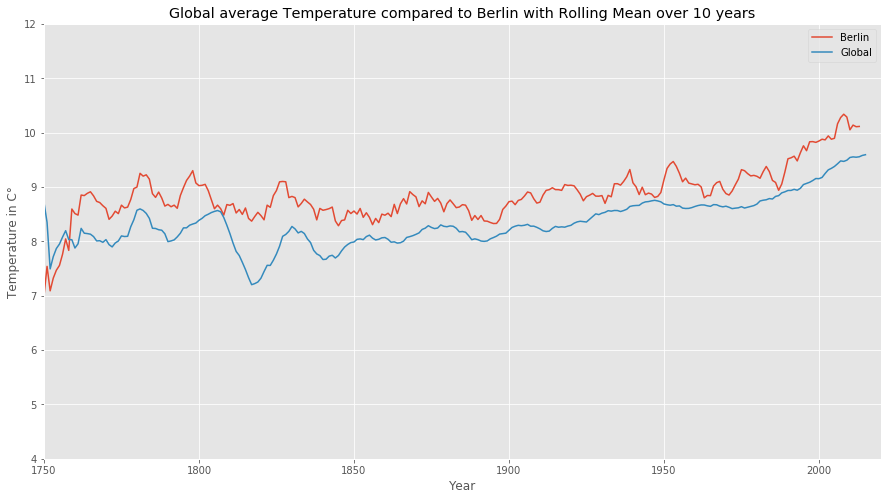

In [96]:
fig = plt.figure(figsize=(15,8))

for frame in [berlin_df, global_df]:
    plt.plot(frame['year'], frame['avg_temp_rm'])

plt.title("Global average Temperature compared to Berlin with Rolling Mean over 10 years")
plt.xlabel("Year")
plt.ylabel("Temperature in C°")
plt.gca().legend(('Berlin','Global'))
plt.ylim(4,12)
plt.xlim(1750,2020)
plt.show()

## Observations from comparhison of Berlin to Global Temperature
  1. Since 1900 it becomes significantly warmer up to the end of the dataset at 2008
      * this observation is valid for Berlin and the global temperature
  2. In Berlin it's circa one degree warmer than in the global average
      * it seems like a relative constant offset between both gradients
  3. From the beginning of the dataset at 1750 to circa 1850 the average temperature is very volatile despite the used moving average
      * this observation is valid for Berlin and the global temperature
  4. In general the city data is more volatile than the global data
      * as the global data is already averaged it has a more smooth gradient
      
## Adding other cities

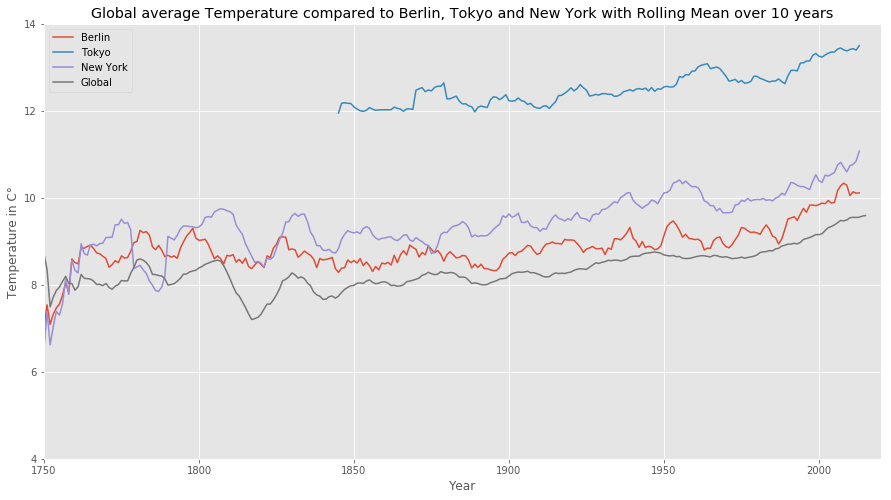

In [97]:
tokyo_csv = "https://raw.githubusercontent.com/herrfeder/DataAnalyst/master/01_ExploreWeatherTrends/tokyo.csv"
newyork_csv ="https://raw.githubusercontent.com/herrfeder/DataAnalyst/master/01_ExploreWeatherTrends/new_york.csv"

tokyo_df = pd.read_csv(tokyo_csv)
newyork_df = pd.read_csv(newyork_csv)

tokyo_df = tokyo_df.dropna()
tokyo_df = tokyo_df.drop(['country'],axis=1)
newyork_df = newyork_df.dropna()
newyork_df = newyork_df.drop(['country'],axis=1)

tokyo_df['avg_temp_rm']=tokyo_df['avg_temp'].rolling(window=10,min_periods=1).mean()
newyork_df['avg_temp_rm']=newyork_df['avg_temp'].rolling(window=10,min_periods=1).mean()

fig = plt.figure(figsize=(15,8))

for frame in [berlin_df,tokyo_df, newyork_df, global_df]:
    plt.plot(frame['year'], frame['avg_temp_rm'])

plt.title("Global average Temperature compared to Berlin, Tokyo and New York with Rolling Mean over 10 years")
plt.xlabel("Year")
plt.ylabel("Temperature in C°")
plt.gca().legend(('Berlin','Tokyo','New York','Global'))
plt.ylim(4,14)
plt.xlim(1750,2020)
plt.show()

## Observation over multiple Cities to Global Temperature
  * we can see

## Correlation Coefficient between Berlin and other cities
  * we can see

In [94]:
berlin_df.corrwith(global_df)

year           1.000000
avg_temp       0.388924
avg_temp_rm    0.653210
dtype: float64

In [99]:
berlin_df.corrwith(newyork_df)

year           1.000000
avg_temp       0.484634
avg_temp_rm    0.824458
dtype: float64

In [106]:
berlin_df[107::].corrwith(tokyo_df)

year           1.000000
avg_temp      -0.155808
avg_temp_rm    0.028070
dtype: float64